## Export table data from EU Horizon 2020 DoW file

First we have to convert the .pdf to .doc. While direct work with .pdf file is also possible, but the interface to .doc files is easier. We going to use `docx` library.

In [1]:
from docx import Document # import library for working with doc files
import pandas as pd # import library to work with tables

open document

In [2]:
document = Document('./EU-PYTHON.docx')

Select table in the doc file, in this case it will be table number 4 (in python numbering strats from 0).
The numbers are not nessesary the same as in the document, since for docx multipage table will be just collection of
several tables. 

In [3]:
table = document.tables[3]

We can acces row cels with `row_cells` attribute. We first going to access the first row, which will be indicated by 0 since we are in Python:

In [4]:
table.row_cells(0)

As you can see there are six cells in the first row, that corespond to six colimns of out table. Since it's a first column, there is a big chance that we will find titles of the columns there. In order to acces text in the columns we have to select the cell in the row (in our case equivalent to column) and use `text` attribute:

In [5]:
table.row_cells(0)[0].text

'WP\nNumber9'

So first cell (column) contain text 'WP\nNumber9'. The '\n' is a spetial symbol that indicate carriage return. Let's have a look what is in the second cell (column):

In [6]:
table.row_cells(0)[1].text

'WP Title'

It's 'WP Title'. So we can be confident that the table we choose (table number 4) is *"1.3.1. WT1 List of work packages"* table from the EU DoW.

Ok, now we would like to get the table in to python. We will do it in two steps:
- extract column names 
- extract infromtation from the rest of the table

create empty list, that will contain our titles

In [7]:
titles = []

Now we will use a loop to go through all the titles that contained in the first row of our table (`table.row_cells(0)`). On the way we will also apply some small fixes to the text:

In [8]:
# create table with titles 
for i in range(len(table.columns)):
    text = table.row_cells(0)[i].text
    # replace \n with  space
    text = text.replace('\n', ' ')
    #remove white space from begining and the end
    text = text.strip()
    # remove numbers from text
    text = ''.join([i for i in text if not i.isdigit()])
    titles.append(text)

Here is our titles:

In [9]:
titles

['WP Number',
 'WP Title',
 'Lead beneficiary',
 'Person- months',
 'Start month',
 'End month']

Now the filling in stage. We first create pandas [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe), python structure that will help us to work with table data. Initially we only provide names of the columns:

In [10]:
df1_3_1 = pd.DataFrame(columns=titles)
df1_3_1 

,WP Number,WP Title,Lead beneficiary,Person- months,Start month,End month


So the DataFrame (just think of it as python table) is now empty. Let's fill it in. We will also use the loop and will loop over table rows (strating from the second one, since the first we have already processed) and in every row we also will loop over every cell (column) to extract the text:

In [11]:
# fill in the table
# loop over rows
for i in range(1, len(table.rows)):
    # create empty list that will contain information from cells (columns)
    row = []
    # loop over cells (columns)
    for n in (range(len(table.columns))):
        # extract text
        text = table.row_cells(i)[n].text.strip()
        # ass text as an element to the `row` list
        row.append(text)    
    # put new row to the DataFrame    
    df1_3_1.loc[i-1] = row

Here is our table now:

In [12]:
df1_3_1

,WP Number,WP Title,Lead beneficiary,Person- months,Start month,End month
0,WP1,Ocean,1 - PARTNER 1,192.00,1,48
1,WP2,Atmosphere,10 - PARTNER 10,221.00,1,48
2,WP3,Land,7 - PARTNER 7,228.00,1,48
3,WP4,Modelling,3 - PARTNER 3,68.00,1,48
4,WP5,Observations,2 - PARTNER 2,142.00,1,48
5,WP6,Data Management,6 - PARTNER 6,25.00,1,48
6,WP7,Outreach and training,13 - PARTNER 13,107.00,1,48
7,WP8,Clustering,1 - PARTNER 1,6.50,1,48
8,WP9,Project Management,1 - PARTNER 1,24.00,1,48
9,,,Total,"1,013.50",,


We can easilly output the result to the Excel file:

In [13]:
# output result to Excel file

writer = pd.ExcelWriter('HORIZON2020_WP.xlsx')
df1_3_1.to_excel(writer, 'Sheet1')
# df1_3_2.to_excel(writer, 'Sheet2')
writer.close()

## List of Beneficiaries

This table is pretty much the same as previous one, so goes without explinations:

In [14]:
table = document.tables[2]

In [15]:
table.row_cells(0)[0].text

'\nNo'

In [16]:
titles = []
for i in range(len(table.columns)):
    text = table.row_cells(0)[i].text
    #remove \n
    text = text.strip()
    # remove numbers from text
    text = ''.join([i for i in text if not i.isdigit()])
    titles.append(text)

In [17]:
titles

['No',
 'Name',
 'Short name',
 'Country',
 'Project entry month',
 'Project exit month']

In [18]:
df = pd.DataFrame(columns=titles)

In [19]:
df

,No,Name,Short name,Country,Project entry month,Project exit month


This is a bit different way to fill in the table, so instead of doing a loop over cells (columns) we just acces them directly. This is uglier code, but still works and completely legimate. 

In [20]:
for i in range(1, len(table.rows)):

    df.loc[i-1] = [table.row_cells(i)[0].text.strip(),
                   table.row_cells(i)[1].text.strip(),
                   table.row_cells(i)[2].text.strip(),
                   table.row_cells(i)[3].text.strip(),
                   table.row_cells(i)[4].text.strip(),
                   table.row_cells(i)[5].text.strip()]

In [21]:
df

,No,Name,Short name,Country,Project entry month,Project exit month
0,1,PARTNER 1,PARTNER 1,COUNTRY 1,1,48
1,2,PARTNER 2,PARTNER 2,COUNTRY 2,1,48
2,3,PARTNER 3,PARTNER 3,COUNTRY 3,1,48
3,4,PARTNER 4,PARTNER 4,COUNTRY 4,1,48
4,5,PARTNER 5,PARTNER 5,COUNTRY 4,1,48
5,6,PARTNER 6,PARTNER 6,COUNTRY 4,1,48
6,7,PARTNER 7,PARTNER 7,COUNTRY 3,1,48
7,8,PARTNER 8,PARTNER 8,COUNTRY 5,1,48
8,9,PARTNER 9,PARTNER 9,COUNTRY 3,1,48
9,10,PARTNER 10,PARTNER 10,COUNTRY 6,1,48


## Get information about tables faster

We would need to have a better way to understand how tables in the `document` object actually corespond to the tables in our .doc document. For this we can just print out some basic informatio about the table, so you can easilly relate it to the table in the .doc:

In [22]:
table = document.tables[4]
print('rows {}'.format(len(table.rows)))
print('columns {}'.format(len(table.rows)))
print('\n')
for i in range(len(table.columns)):
    print(table.row_cells(0)[i].text)

rows 12
columns 12


Deliverable Number14

Deliverable Title
WP
number9

Lead beneficiary

Type15
Dissemination level16
Due Date (in
months)17


Just change the number in `document.tables[3]` to acces different tables.

## 1.3.2. WT2 list of deliverables

The "List of deliverables" is more complicated table, since it is multipage. If we use our little script from the previous section on the fith table (4 in python notation):

In [23]:
table = document.tables[4]
print('rows {}'.format(len(table.rows)))
print('columns {}'.format(len(table.rows)))
print('\n')
for i in range(len(table.columns)):
    print(table.row_cells(0)[i].text)

rows 12
columns 12


Deliverable Number14

Deliverable Title
WP
number9

Lead beneficiary

Type15
Dissemination level16
Due Date (in
months)17


We will see that tables from 5 (4) to 12 (11) have the same tatiles. So in the `document` one big multipage table is splitted in to 7 separate tables. We have to glue them back together. 

Firs step will be a standard one - extract titles from the very first raw and create empty DataFrame:

In [24]:
table = document.tables[4]
titles = []
for i in range(len(table.columns)):
    text = table.row_cells(0)[i].text
    # replace \n with  space
    text = text.replace('\n', ' ')
    #remove white space from begining and the end
    text = text.strip()
    # remove numbers from text
    text = ''.join([i for i in text if not i.isdigit()])
    titles.append(text)

In [25]:
df1_3_2 = pd.DataFrame(columns=titles)

In [26]:
df1_3_2

,Deliverable Number,Deliverable Title,WP number,Lead beneficiary,Type,Dissemination level,Due Date (in months)


So the problem now is to glue different tables together. The strategy here is to check if the "Deliverable Number" column is empty in the first row of the new table and if it is glue together the last row from the previous table and first row from the new table:

In [27]:
df1_3_2 = pd.DataFrame(columns=titles)
# loop over tables from 4 to 11
for table_number in range(4,11):
    # create table object
    table = document.tables[table_number]
    # create empty temporary DataFrame
    df_temp = pd.DataFrame(columns=titles)
    
    # Standard way to get information from the rest of the table (excluding the first row),
    # fill in temporary DataFrame
    for i in range(1, len(table.rows)):
        row = []
        for n in (range(len(table.columns))):
            text = table.row_cells(i)[n].text.strip()
            text = text.replace('\n', ' ')
            row.append(text)
        df_temp.loc[i-1] = row
    # if our final DataFrame (df1_3_2) is empty, then we are working with the very first table in a sequence
    # and just copy the content of the temporary DataFrame to the final DataFrame
    if df1_3_2.empty:
        df1_3_2 = df1_3_2.append(df_temp)
    # else we begin the check
    else:
        # if the "Deliverable Number" column in the first row is empty, then:
        if df_temp.iloc[0]['Deliverable Number']=='':
            # extract the last row from the final DataFrame 
            cell_beg = df1_3_2.iloc[-1]
            # Extract the first row from the temporary DataFrame
            cell_end = df_temp.iloc[0]
            # for every cell (column) combine information from the beggining and the end of the cell
            # The combined information will apear in the last cell of the final DataFrame
            # Since the `cal_beg` is just a reference to the last row of the final DataFrame, 
            # the combined information directly apear in the final DataFrame (df1_3_2)
            for cell in range(len(cell_beg)):
                cell_beg[cell] = '{} {}'.format(cell_beg[cell], cell_end[cell])
            # remove first row from the temporary DataFrame
            df_temp.drop(df_temp.index[0], inplace=True)
            # append temporary DataFrame to final DataFrame
            df1_3_2 = df1_3_2.append(df_temp)
        else:
            # else, just append temporary DataFrame to final DataFrame
            df1_3_2 = df1_3_2.append(df_temp)
            
            
    

In [28]:
df1_3_2

,Deliverable Number,Deliverable Title,WP number,Lead beneficiary,Type,Dissemination level,Due Date (in months)
0,D1.1,Ocean deliverable 1,WP1,1 - PARTNER 1,Report,Public,4
1,D1.2,Ocean deliverable 2,WP1,1 - PARTNER 1,Other,Public,12
2,D1.3,Ocean deliverable 3,WP1,8 - PARTNER 8,Other,Public,24
3,D1.4,Ocean deliverable 4,WP1,9 - PARTNER 9,Report,Public,30
4,D1.5,Ocean deliverable 5,WP1,7 - PARTNER 7,Report,Public,48
5,D1.6,Ocean deliverable 6,WP1,7 - PARTNER 7,Report,Public,48
6,D1.7,Ocean deliverable 7,WP1,3 - PARTNER 3,Report,"Confidential, only for members of the consorti...",20
7,D1.8,Ocean deliverable 8,WP1,1 - PARTNER 1,Report,Public,36
8,D2.1,Atmosphere deliverable 1,WP2,10 - PARTNER 10,Demonstrator,Public,18
9,D2.2,Atmosphere deliverable 2,WP2,12 - PARTNER 12,Report,Public,30


You can save the result to Excel:

In [29]:
writer = pd.ExcelWriter('HORIZON2020_deliverables.xlsx')
df1_3_2.to_excel(writer, 'Sheet1')
# df1_3_2.to_excel(writer, 'Sheet2')
writer.close()

## Convert "Due dates" to calendar months

We can begin simple analysis of our data by convertin "Due dates" to calendar months. For this we would need to import couple of new modules:

In [30]:
import datetime
from dateutil.relativedelta import relativedelta

The 'datetime' module allows to work with time in Python. We define the starting date of out project in the Python format:

In [31]:
stime = datetime.date(2016, 10, 15)

If we add to this date result of `relativedelta` function with argument in months, we will get what is the, say, 48th month of the project in real time: 

In [32]:
stime + relativedelta(months=48)

datetime.date(2020, 10, 15)

Now let's define a function that will convert any number of months since the project start in to real time: 

In [33]:
def totime(x):
    stime = datetime.date(2016, 10, 15)
    otime = stime + relativedelta(months=x)
    return otime

One extra step is to convert months in the `Due Date (in months)` column in to integers, since now they are just strings:

In [34]:
df1_3_2['Due Date (in months)'] = df1_3_2['Due Date (in months)'].astype('int')

And finally apply our function to the `Due Date (in months)` column:

In [35]:
df1_3_2['Due Date'] = df1_3_2['Due Date (in months)'].apply(totime)

In [36]:
df1_3_2

,Deliverable Number,Deliverable Title,WP number,Lead beneficiary,Type,Dissemination level,Due Date (in months),Due Date
0,D1.1,Ocean deliverable 1,WP1,1 - PARTNER 1,Report,Public,4,2017-02-15
1,D1.2,Ocean deliverable 2,WP1,1 - PARTNER 1,Other,Public,12,2017-10-15
2,D1.3,Ocean deliverable 3,WP1,8 - PARTNER 8,Other,Public,24,2018-10-15
3,D1.4,Ocean deliverable 4,WP1,9 - PARTNER 9,Report,Public,30,2019-04-15
4,D1.5,Ocean deliverable 5,WP1,7 - PARTNER 7,Report,Public,48,2020-10-15
5,D1.6,Ocean deliverable 6,WP1,7 - PARTNER 7,Report,Public,48,2020-10-15
6,D1.7,Ocean deliverable 7,WP1,3 - PARTNER 3,Report,"Confidential, only for members of the consorti...",20,2018-06-15
7,D1.8,Ocean deliverable 8,WP1,1 - PARTNER 1,Report,Public,36,2019-10-15
8,D2.1,Atmosphere deliverable 1,WP2,10 - PARTNER 10,Demonstrator,Public,18,2018-04-15
9,D2.2,Atmosphere deliverable 2,WP2,12 - PARTNER 12,Report,Public,30,2019-04-15


In [37]:
writer = pd.ExcelWriter('HORIZON2020_deliverables_new.xlsx')
df1_3_2.to_excel(writer, 'Sheet1')
# df1_3_2.to_excel(writer, 'Sheet2')
writer.close()

## Some basic analysis

All deliverables with PARTNER 1 lead:

In [38]:
df1_3_2[df1_3_2['Lead beneficiary']=='1 - PARTNER 1']

,Deliverable Number,Deliverable Title,WP number,Lead beneficiary,Type,Dissemination level,Due Date (in months),Due Date
0,D1.1,Ocean deliverable 1,WP1,1 - PARTNER 1,Report,Public,4,2017-02-15
1,D1.2,Ocean deliverable 2,WP1,1 - PARTNER 1,Other,Public,12,2017-10-15
7,D1.8,Ocean deliverable 8,WP1,1 - PARTNER 1,Report,Public,36,2019-10-15
1,D3.5,Land deliverable 5,WP3,1 - PARTNER 1,Report,Public,48,2020-10-15
5,D4.4,Modelling deliverable 4,WP4,1 - PARTNER 1,Report,Public,48,2020-10-15
2,D8.1,Clustering deliverable 1,WP8,1 - PARTNER 1,Report,Public,1,2016-11-15
3,D8.2,Clustering deliverable 2,WP8,1 - PARTNER 1,Report,Public,1,2016-11-15
4,D8.3,Clustering deliverable 3,WP8,1 - PARTNER 1,Report,Public,3,2017-01-15
5,D8.4,Clustering deliverable 4,WP8,1 - PARTNER 1,Report,Public,3,2017-01-15
6,D8.5,Clustering deliverable 5,WP8,1 - PARTNER 1,Report,Public,4,2017-02-15


Sort PARTNER 1 deliverables by date of delivery:

In [39]:
df1_3_2[df1_3_2['Lead beneficiary']=='1 - PARTNER 1'].sort_values(by='Due Date')

,Deliverable Number,Deliverable Title,WP number,Lead beneficiary,Type,Dissemination level,Due Date (in months),Due Date
2,D8.1,Clustering deliverable 1,WP8,1 - PARTNER 1,Report,Public,1,2016-11-15
3,D8.2,Clustering deliverable 2,WP8,1 - PARTNER 1,Report,Public,1,2016-11-15
2,D9.1,Project management deliverable 1,WP9,1 - PARTNER 1,Report,"Confidential, only for members of the consorti...",2,2016-12-15
3,D9.2,Project management deliverable 2,WP9,1 - PARTNER 1,Report,"Confidential, only for members of the consorti...",3,2017-01-15
4,D8.3,Clustering deliverable 3,WP8,1 - PARTNER 1,Report,Public,3,2017-01-15
5,D8.4,Clustering deliverable 4,WP8,1 - PARTNER 1,Report,Public,3,2017-01-15
0,D1.1,Ocean deliverable 1,WP1,1 - PARTNER 1,Report,Public,4,2017-02-15
6,D8.5,Clustering deliverable 5,WP8,1 - PARTNER 1,Report,Public,4,2017-02-15
4,D9.3,Project management deliverable 3,WP9,1 - PARTNER 1,Report,"Confidential, only for members of the consorti...",5,2017-03-15
7,D8.6,Clustering deliverable 6,WP8,1 - PARTNER 1,Report,Public,5,2017-03-15


How many deliverables every lead benificeary have:

In [40]:
df1_3_2.groupby(by='Lead beneficiary').count()

,Deliverable Number,Deliverable Title,WP number,Type,Dissemination level,Due Date (in months),Due Date
Lead beneficiary,,,,,,,
1 - PARTNER 1,22,22,22,22,22,22,22
10 - PARTNER 10,2,2,2,2,2,2,2
11 - PARTNER 11,3,3,3,3,3,3,3
11 - PARTNER 11,1,1,1,1,1,1,1
12 - PARTNER 12,2,2,2,2,2,2,2
13 - PARTNER 13,9,9,9,9,9,9,9
14 - PARTNER 14,3,3,3,3,3,3,3
2 - PARTNER 2,3,3,3,3,3,3,3
2 - PARTNER 2,1,1,1,1,1,1,1


Sort in descending order

In [41]:
df1_3_2.groupby(by='Lead beneficiary').count().sort_values(by='Deliverable Title', ascending=False)

,Deliverable Number,Deliverable Title,WP number,Type,Dissemination level,Due Date (in months),Due Date
Lead beneficiary,,,,,,,
1 - PARTNER 1,22,22,22,22,22,22,22
13 - PARTNER 13,9,9,9,9,9,9,9
6 - PARTNER 6,8,8,8,8,8,8,8
8 - PARTNER 8,5,5,5,5,5,5,5
11 - PARTNER 11,3,3,3,3,3,3,3
14 - PARTNER 14,3,3,3,3,3,3,3
2 - PARTNER 2,3,3,3,3,3,3,3
3 - PARTNER 3,3,3,3,3,3,3,3
10 - PARTNER 10,2,2,2,2,2,2,2


Do some plots

In [42]:
%matplotlib inline

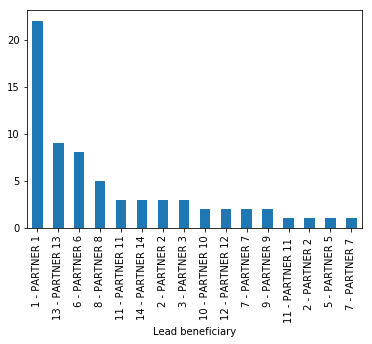

In [43]:
dnum = df1_3_2.groupby(by='Lead beneficiary').count().sort_values(by='Deliverable Title', ascending=False)
dnum['Deliverable Number'].plot(kind= 'bar')

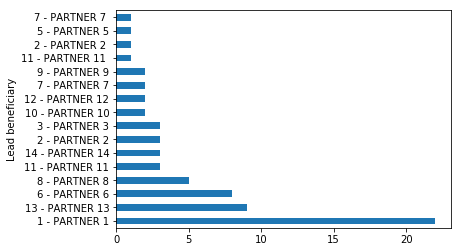

In [44]:
dnum['Deliverable Number'].plot(kind= 'barh')

In [45]:
df1_3_2.groupby(by = 'Type').count()

,Deliverable Number,Deliverable Title,WP number,Lead beneficiary,Dissemination level,Due Date (in months),Due Date
Type,,,,,,,
Demonstrator,3,3,3,3,3,3,3
Demonstrator,1,1,1,1,1,1,1
ORDP: Open Research Data Pilot,1,1,1,1,1,1,1
Other,2,2,2,2,2,2,2
Report,51,51,51,51,51,51,51
Report,2,2,2,2,2,2,2
"Websites, patents filling, etc.",8,8,8,8,8,8,8


In [46]:
df1_3_2.groupby(by = 'Dissemination level').count()


,Deliverable Number,Deliverable Title,WP number,Lead beneficiary,Type,Due Date (in months),Due Date
Dissemination level,,,,,,,
"Confidential, only for members of the consortium (including the",1,1,1,1,1,1,1
"Confidential, only for members of the consortium (including the Commission Services)",8,8,8,8,8,8,8
Public,57,57,57,57,57,57,57
Public,2,2,2,2,2,2,2


In [47]:
df1_3_2.groupby(by = 'Due Date (in months)').count().sort_values(by='Deliverable Title', ascending=False)


,Deliverable Number,Deliverable Title,WP number,Lead beneficiary,Type,Dissemination level,Due Date
Due Date (in months),,,,,,,
48,12,12,12,12,12,12,12
36,9,9,9,9,9,9,9
6,6,6,6,6,6,6,6
18,5,5,5,5,5,5,5
24,5,5,5,5,5,5,5
30,4,4,4,4,4,4,4
12,4,4,4,4,4,4,4
3,3,3,3,3,3,3,3
2,2,2,2,2,2,2,2


In [48]:
df1_3_2.groupby(by = 'Due Date').count().sort_values(by='Deliverable Title', ascending=False)


,Deliverable Number,Deliverable Title,WP number,Lead beneficiary,Type,Dissemination level,Due Date (in months)
Due Date,,,,,,,
2020-10-15,12,12,12,12,12,12,12
2019-10-15,9,9,9,9,9,9,9
2017-04-15,6,6,6,6,6,6,6
2018-04-15,5,5,5,5,5,5,5
2018-10-15,5,5,5,5,5,5,5
2019-04-15,4,4,4,4,4,4,4
2017-10-15,4,4,4,4,4,4,4
2017-01-15,3,3,3,3,3,3,3
2016-12-15,2,2,2,2,2,2,2


In [49]:
df1_3_2.sort_values(by='Due Date', ascending=True)


,Deliverable Number,Deliverable Title,WP number,Lead beneficiary,Type,Dissemination level,Due Date (in months),Due Date
2,D8.1,Clustering deliverable 1,WP8,1 - PARTNER 1,Report,Public,1,2016-11-15
3,D8.2,Clustering deliverable 2,WP8,1 - PARTNER 1,Report,Public,1,2016-11-15
5,D7.1,Outreach and training deliverable 1,WP7,13 - PARTNER 13,"Websites, patents filling, etc.",Public,2,2016-12-15
2,D9.1,Project management deliverable 1,WP9,1 - PARTNER 1,Report,"Confidential, only for members of the consorti...",2,2016-12-15
4,D8.3,Clustering deliverable 3,WP8,1 - PARTNER 1,Report,Public,3,2017-01-15
3,D9.2,Project management deliverable 2,WP9,1 - PARTNER 1,Report,"Confidential, only for members of the consorti...",3,2017-01-15
5,D8.4,Clustering deliverable 4,WP8,1 - PARTNER 1,Report,Public,3,2017-01-15
0,D1.1,Ocean deliverable 1,WP1,1 - PARTNER 1,Report,Public,4,2017-02-15
6,D8.5,Clustering deliverable 5,WP8,1 - PARTNER 1,Report,Public,4,2017-02-15
7,D8.6,Clustering deliverable 6,WP8,1 - PARTNER 1,Report,Public,5,2017-03-15


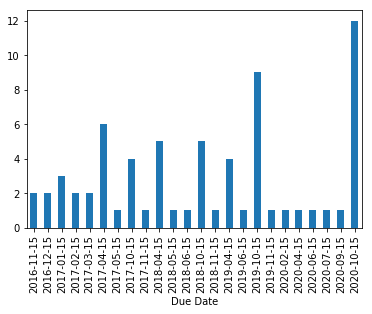

In [50]:
df1_3_2.groupby(by = 'Due Date').count()['Deliverable Number'].plot(kind='bar')
